# Banking Marketing Targets Project

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
data = pd.read_csv('train.csv', delimiter=';')

In [56]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [57]:
data.y = data.y.map({'no':0,'yes':1})

C:\Users\Aman\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


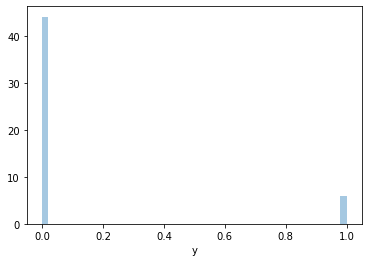

In [58]:
sns.distplot(data.y);

In [59]:
(data.y == 0).sum()

39922

In [60]:
(data.y == 1).sum()

5289

Dataset is highly imbalanced with very large no.(39,922) of rows for non diabetic patient and small (5289) no. of rows for diabetic patients.
So,, we balance the data by doing the sampling and making the rows for diabetic as well as for non_diabetic equal

In [61]:
m1 = data[data.y ==1]
m1.shape

(5289, 17)

In [62]:
m2 = data[data.y == 0]

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
rem_x,use_x,rem_y,use_y = train_test_split(m2.drop('y',axis = 1), m2.y, test_size = 5289,random_state = 42)

In [65]:
use_x['y'] = use_y

In [66]:
data = m1.append(use_x).sort_index()

In [67]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
13,58,technician,married,unknown,no,71,yes,no,unknown,5,may,71,1,-1,0,unknown,0
23,25,services,married,secondary,no,50,yes,no,unknown,5,may,342,1,-1,0,unknown,0
34,51,management,married,tertiary,no,10635,yes,no,unknown,5,may,336,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,1
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,1
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1


In [68]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [69]:
print('Column Name\tNo. of Unique values\tUnique Values')
for i in data.columns[[1,2,3,4,6,7,8,9,10,15,16]]:
    print(i,'\t\t',len(data[str(i)].unique()),'\t\t', data[str(i)].unique())

Column Name	No. of Unique values	Unique Values
job 		 12 		 ['technician' 'unknown' 'services' 'management' 'blue-collar' 'admin.'
 'self-employed' 'retired' 'student' 'entrepreneur' 'unemployed'
 'housemaid']
marital 		 3 		 ['single' 'married' 'divorced']
education 		 4 		 ['secondary' 'unknown' 'tertiary' 'primary']
default 		 2 		 ['no' 'yes']
housing 		 2 		 ['yes' 'no']
loan 		 2 		 ['no' 'yes']
contact 		 3 		 ['unknown' 'cellular' 'telephone']
day 		 31 		 [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month 		 12 		 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome 		 4 		 ['unknown' 'other' 'failure' 'success']
y 		 2 		 [0 1]


In [17]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
13,58,technician,married,unknown,no,71,yes,no,unknown,5,may,71,1,-1,0,unknown,0
23,25,services,married,secondary,no,50,yes,no,unknown,5,may,342,1,-1,0,unknown,0
34,51,management,married,tertiary,no,10635,yes,no,unknown,5,may,336,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,1
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,1
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1


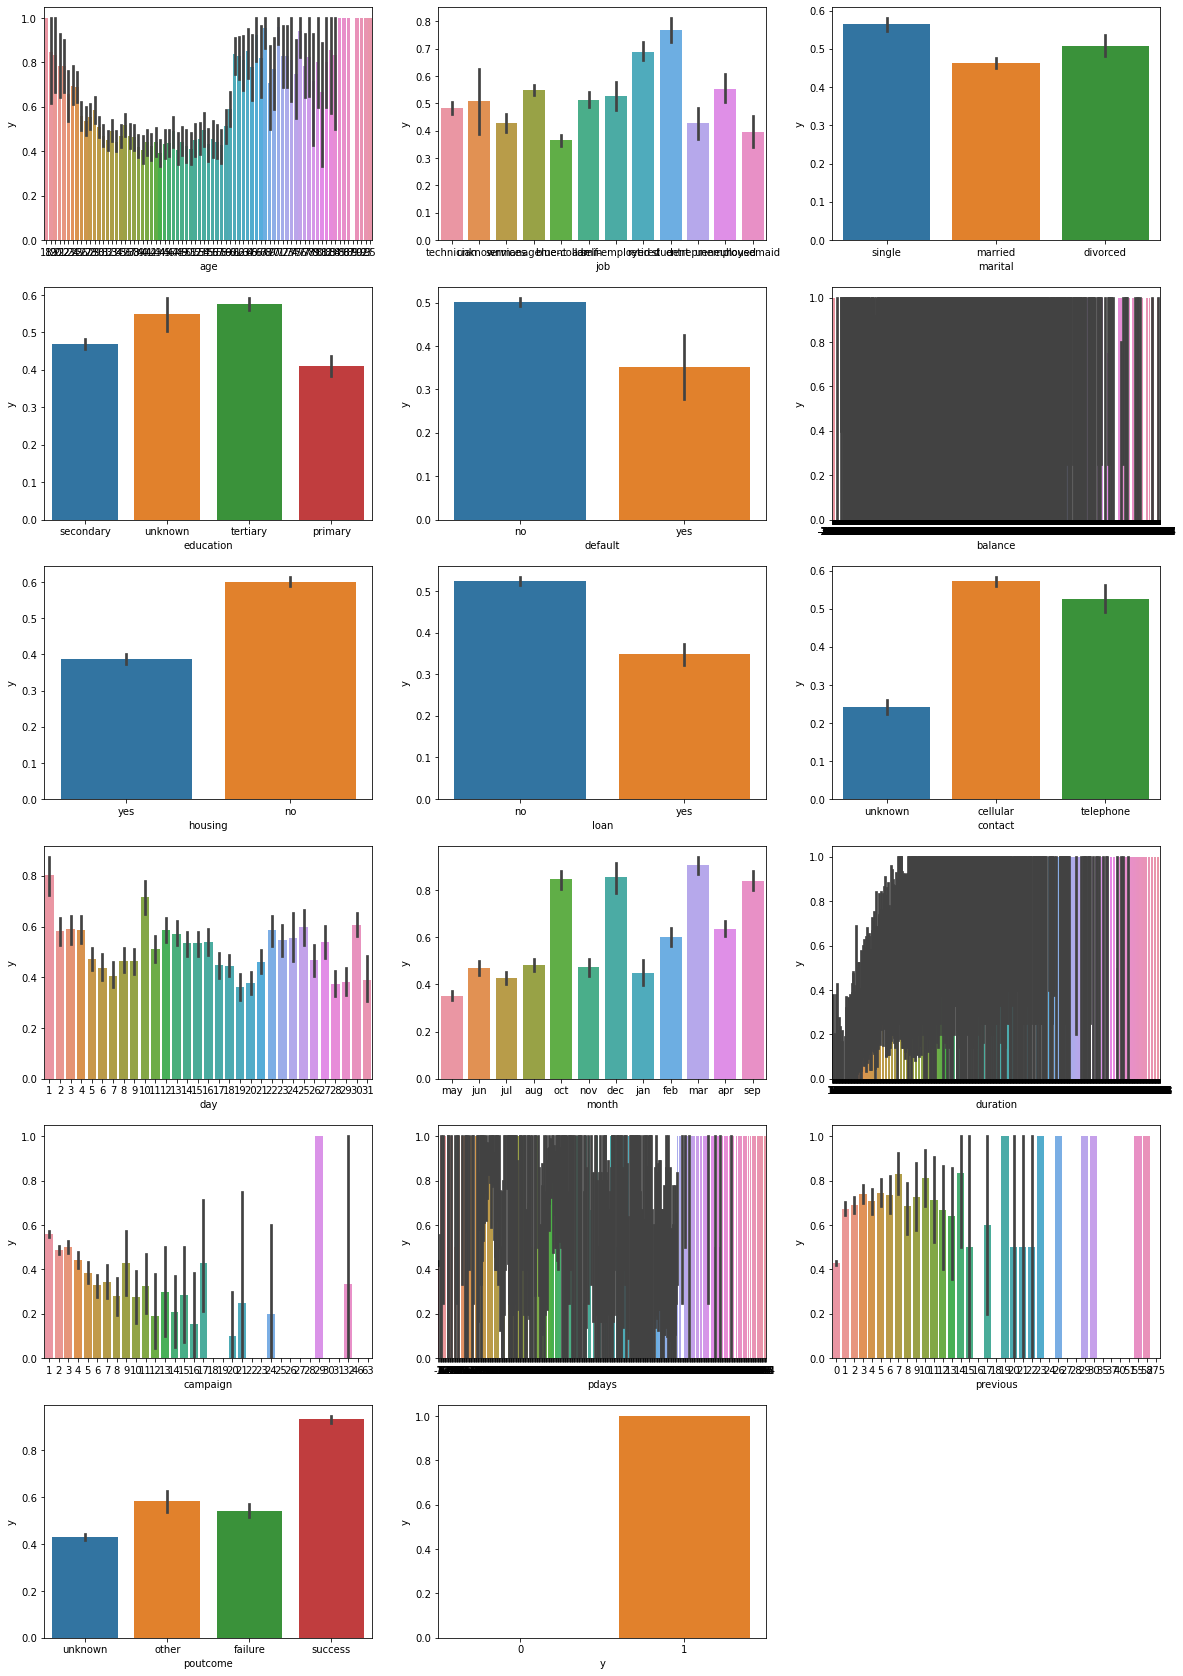

In [70]:
plt.figure(figsize=(20,30))
plotnumber = 1
for i in data.columns:
    plt.subplot(6,3,plotnumber)
    sns.barplot(x = str(i) , y = 'y', data = data)
    plotnumber += 1

In [71]:
s = pd.crosstab(data.age,data.y)

In [72]:
s['total'] = s[0]+s[1]

In [73]:
s['prop'] = s[1]/s['total']

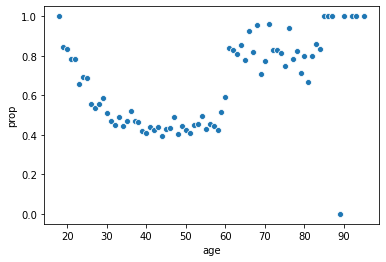

In [74]:
sns.scatterplot(x = s.index, y = s['prop'])

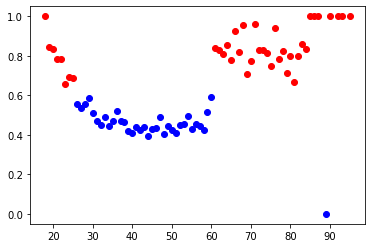

In [75]:
plt.scatter(x = s.index[s.prop > 0.6], y = s['prop'][s.prop > 0.6],c = 'red')
plt.scatter(x = s.index[s.prop < 0.6], y = s['prop'][s.prop < 0.6],c = 'blue')



In [76]:
i = s.index[s.prop < 0.6]
i

Int64Index([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
            43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
            60, 89],
           dtype='int64', name='age')

In [77]:
i = i.drop(89)
i = list(i)
k = dict()
for j in i:
    k[j] = 0
k

{26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0}

In [78]:
data['age_cat'] = np.ones(data.shape[0])

In [79]:
data['age_cat'] = data.age.map(k)

In [80]:
data.age_cat.replace(data.age_cat[23],1, inplace= True)

# Some Experiment

In [20]:
s

y,0,1,total,prop
age,,,,
18,0,7,7,1.000000
19,2,11,13,0.846154
20,3,15,18,0.833333
21,6,22,28,0.785714
22,11,40,51,0.784314
...,...,...,...,...
89,1,0,1,0.000000
90,0,2,2,1.000000
92,0,2,2,1.000000


In [21]:
h = pd.DataFrame({'Age':s.index,'prop':s.prop})

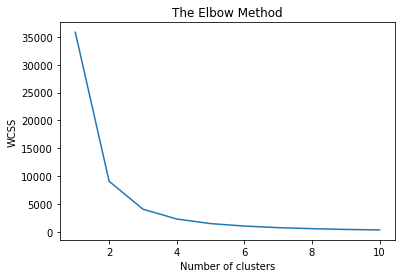

In [22]:
#elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(h)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(h)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


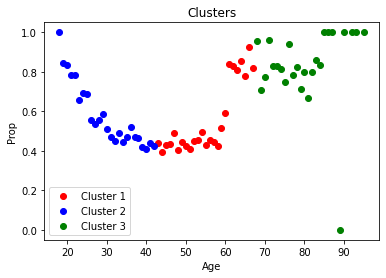

In [151]:
# Visualising the clusters
plt.scatter(h[y_kmeans == 0]['Age'], h[y_kmeans == 0]['prop'],c = 'red', label = 'Cluster 1')
plt.scatter(h[y_kmeans == 1]['Age'], h[y_kmeans == 1]['prop'],c = 'blue', label = 'Cluster 2')
plt.scatter(h[y_kmeans == 2]['Age'], h[y_kmeans == 2]['prop'],c = 'green', label = 'Cluster 3')
plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('Prop')
plt.legend()
plt.show()

In [23]:
h

,Age,prop
age,,
18,18,1.000000
19,19,0.846154
20,20,0.833333
21,21,0.785714
22,22,0.784314
...,...,...
89,89,0.000000
90,90,1.000000
92,92,1.000000


In [34]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_cat
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,0.0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,0.0
13,58,technician,married,unknown,no,71,yes,no,unknown,5,may,71,1,-1,0,unknown,0,0.0
23,25,services,married,secondary,no,50,yes,no,unknown,5,may,342,1,-1,0,unknown,0,1.0
34,51,management,married,tertiary,no,10635,yes,no,unknown,5,may,336,1,-1,0,unknown,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,1,1.0
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,1,1.0
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1,0.0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1,1.0


In [81]:
data.marital = data.marital.map({'married':0,'divorced':1,'single':2})
data.education = data.education.map({'primary':0,'secondary':1,'unknown':2,'tertiary':3})
data.default = data.default.map({'no':0,'yes':1})
data.housing = data.housing.map({'no':0,'yes':1})
data.loan = data.loan.map({'no':0,'yes':1})
data.contact = data.contact.map({'unknown':0,'telephone':1,'cellular':2})
data.poutcome = data.poutcome.map({'unknown':0, 'failure':1, 'other':2, 'success':3})
data.month = data.month.map({'jan':2,'feb':6,'mar':11,'apr':7,'may':0,'jun':4,'jul':1,'aug':5,'sep':9,'oct':8,'nov':3,'dec':10})

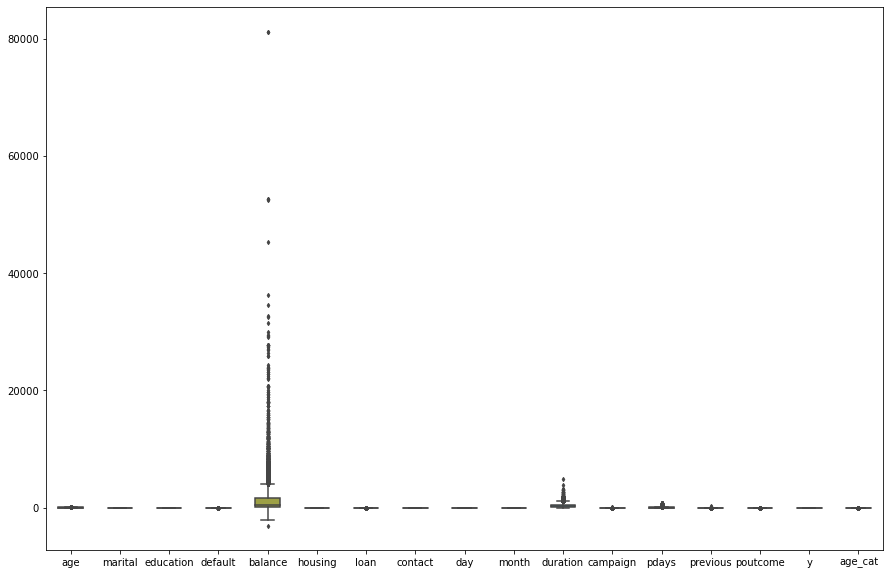

In [82]:
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = data, width = 0.5,ax = ax, fliersize= 3)

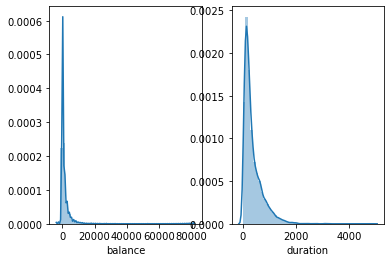

In [83]:
plt.subplot(121)
sns.distplot(data.balance)
plt.subplot(122)
sns.distplot(data.duration)

In [84]:
iqr = np.percentile(data.balance,75) - np.percentile(data.balance,25)
ra = (np.percentile(data.balance,75) + 3*iqr)
rb = (np.percentile(data.balance,75) - 3*iqr)
data.balance.replace(list(data.balance[data.balance > ra]),ra,inplace = True)
data.balance.replace(list(data.balance[data.balance < rb]),rb,inplace = True)

In [85]:
iqr = np.percentile(data.duration,75) - np.percentile(data.duration,25)
ra = (np.percentile(data.duration,75) + 3*iqr)
data.duration.replace(list(data.duration[data.duration > ra]),ra,inplace = True)

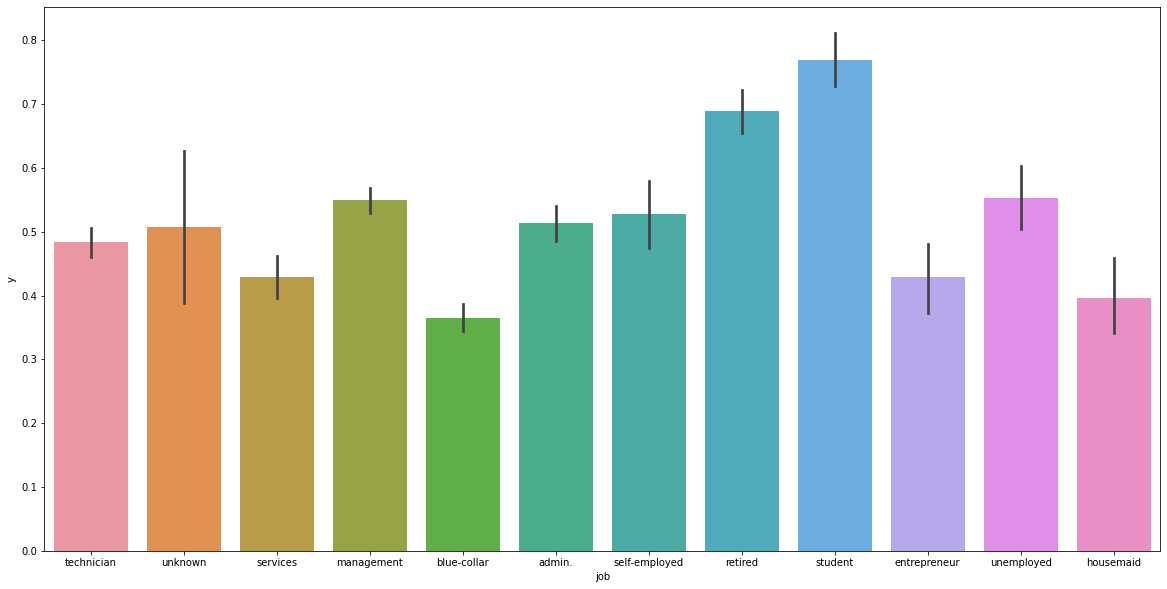

In [86]:
plt.figure(figsize=(20,10))
sns.barplot(x= data.job, y= data.y, data=data)

In [87]:
data.job.unique()

array(['technician', 'unknown', 'services', 'management', 'blue-collar',
       'admin.', 'self-employed', 'retired', 'student', 'entrepreneur',
       'unemployed', 'housemaid'], dtype=object)

In [88]:
data.job  = data.job.map({'management':9, 'technician':5, 'entrepreneur':1, 'blue-collar':0,
       'unknown':4, 'retired':10, 'admin.':7, 'services':3, 'self-employed':6,
       'unemployed':8, 'housemaid':2, 'student':11})

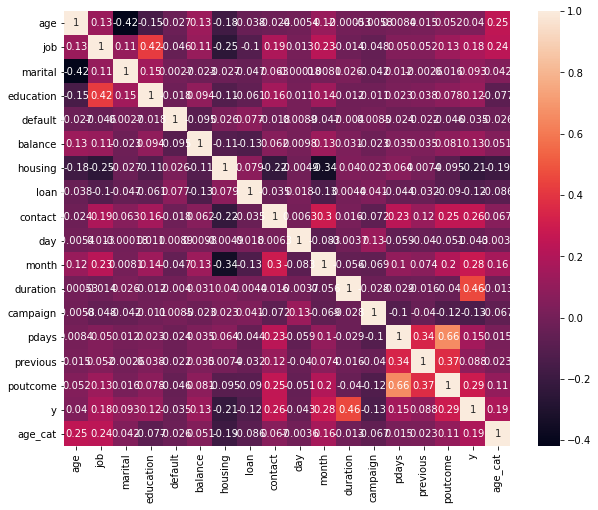

In [89]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot= True)

In [90]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_cat
1,44,5,2,1,0,29.0,1,0,0,5,0,151,1,-1,0,0,0,0.0
4,33,4,2,2,0,1.0,0,0,0,5,0,198,1,-1,0,0,0,0.0
13,58,5,0,2,0,71.0,1,0,0,5,0,71,1,-1,0,0,0,0.0
23,25,3,0,1,0,50.0,1,0,0,5,0,342,1,-1,0,0,0,1.0
34,51,9,0,3,0,6462.0,1,0,0,5,0,336,1,-1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,10,0,1,0,2850.0,0,0,2,17,3,300,1,40,8,1,1,1.0
45205,25,5,2,1,0,505.0,0,1,2,17,3,386,2,-1,0,0,1,1.0
45206,51,5,0,3,0,825.0,0,0,2,17,3,977,3,-1,0,0,1,0.0
45207,71,10,1,0,0,1729.0,0,0,2,17,3,456,2,-1,0,0,1,1.0


In [91]:
X= data.drop(['y'],axis =1)
Y = data.y

In [93]:
from sklearn import feature_selection as fs
mi_score = fs.mutual_info_classif(X,Y,n_neighbors= 10,random_state=22)
pd.DataFrame(mi_score,index=X.columns)


,0
age,0.019352
job,0.014904
marital,0.005720
education,0.003819
default,0.001281
balance,0.022508
housing,0.018464
loan,0.008923
contact,0.034746
day,0.013193


In [94]:
X= data.drop(['y','default'],axis =1)
Y = data.y

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [96]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state =42)

In [97]:
scale = StandardScaler()
x_train =scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [98]:
X_scaled = StandardScaler().fit_transform(X)

This Problem is related to Potential Customer detection, So our main objective is to build a model that can correctly predict whether a individual is our potential customer or not. We should give more priority to `maximize Recall or Sensitivity` and at the same time we should maximize `Precision` or we can say we should minimize the False Positive Rate.

In [99]:
from sklearn.metrics import confusion_matrix, roc_auc_score
def score(model, x_test, y_test):
    y_pred = model.predict(x_test)
    
    conf_mat = confusion_matrix(y_test,y_pred)
    true_positive = conf_mat[1][1]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_negative = conf_mat[0][0]

    Precision = true_positive/(true_positive+false_positive)
    Recall = true_positive/(true_positive+false_negative)
    F1_Score = 2*(Recall * Precision) / (Recall+ Precision)
    auc = roc_auc_score(y_test, y_pred)
    
    print('Model Name\t',model)
    print('Precision\t {:.4f}'.format(Precision))
    print('Recall\t\t {:.4f}'.format(Recall))
    print('F1 Score\t {:.4f}'.format(F1_Score))
    print('AUC\t\t {:.4f}'.format(auc))

# Logistic Regression

In [100]:
from sklearn.linear_model  import LogisticRegression
# create model
model = LogisticRegression()
model.fit(x_train,y_train);

In [186]:
score(model,x_test,y_test)

Model Name	 LogisticRegression()
Precision	 0.7986
Recall		 0.8041
F1 Score	 0.8014
AUC		 0.8066


# Decision Tree

In [273]:
from sklearn.tree import DecisionTreeClassifier
# create model
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
score(model,x_test,y_test)

Model Name	 DecisionTreeClassifier()
Precision	 0.7742
Recall		 0.7651
F1 Score	 0.7696
AUC		 0.7775


# Random Forest

In [287]:
from sklearn.ensemble import RandomForestClassifier
# create model
model = RandomForestClassifier()
model.fit(x_train,y_train)
score(model,x_test,y_test)

Model Name	 RandomForestClassifier()
Precision	 0.8182
Recall		 0.8860
F1 Score	 0.8507
AUC		 0.8503


# XG Boost

In [282]:
from xgboost import XGBClassifier
# create model
model = XGBClassifier()
model.fit(x_train,y_train)
score(model,x_test,y_test)

C:\Users\Aman\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:30:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Name	 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Precision	 0.8193
Recall		 0.8791
F1 Score	 0.8481
AUC		 0.8483


C:\Users\Aman\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Since now, Random Forest has given us the best Result.
Now, Our next step is to try some more models, hypertune our parameters and make it best fit to our data and to also check our model on testing data